**<h1 align="center">Sales Forecasting</h1>**

<a class="anchor" id="chapter1"></a>

# 1. Data Exploration

</a>

<a class="anchor" id="sub-section-1_1"></a>

## 1.1. Imports

</a>

In [80]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [81]:
# Configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Force normal decimal formatting
pd.options.display.float_format = '{:.4f}'.format

In [82]:
# Import xlsx dataset into pandas dataframe
market_data = pd.read_excel('../Data/Case2_Market data.xlsx', header=[0,1,2])

# Import csv dataset into pandas dataframe
sales_data = pd.read_csv('../Data/Case2_Sales data.csv', sep=";")

<a class="anchor" id="sub-section-1_2"></a>

## 1.2. Market Data

</a>

In [83]:
market_data.head()

Unnamed: 0_level_0  \
  Index 2010=100 (if not otherwise noted)   
                                     date   
0                                  2004m2   
1                                  2004m3   
2                                  2004m4   
3                                  2004m5   
4                                  2004m6   

                                     China  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO156   
0                                  16.9407   
1                                  23.7119   
2                                  24.4352   
3                                  23.7081   
4                                  27.0091   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP156   
0                                 16.9407   
1                                 23.7119   
2                                 24.4352   
3                                 23.7081   
4                                 27.0091   

                                    France  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO250   
0                                 112.0913   
1                                 136.3280   
2                                 117.7918   
3                                 109.0025   
4                                 133.7857   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP250   
0                                 83.4589   
1                                106.1682   
2                                 92.0076   
3                                 85.6965   
4                                106.6415   

                                   Germany  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO276   
0                                  82.6230   
1                                 100.5566   
2                                  89.6532   
3                                  86.8806   
4                                  99.0108   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP276   
0                                 79.4525   
1                                 97.0129   
2                                 84.9324   
3                                 82.3728   
4                                 95.1087   

                                     Italy  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO380   
0                                 124.2896   
1                                 143.4117   
2                                 129.0838   
3                                 135.5904   
4                                 136.4249   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP380   
0                                 86.5605   
1                                106.3445   
2                                 95.5797   
3                                100.0870   
4                                110.8897   

                                     Japan  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO392   
0                                 109.3340   
1                                 140.8846   
2                                 105.8536   
3                                 101.8648   
4                                 120.3329   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP392   
0                                110.4953   
1                                144.6862   
2                                102.6558   
3                                100.3053   
4                                119.6164   

            

| Feature            | Description |
|----------------|------------------------------------------|
| date            | Index 2010 = 100 (if not otherwise noted) |
| MAB_ELE_PRO156 | China Production Index Machinery & Electricals |
| MAB_ELE_SHP156 | China Shipments Index Machinery & Electricals |
| MAB_ELE_PRO250 | France Production Index Machinery & Electricals |
| MAB_ELE_SHP250 | France Shipments Index Machinery & Electricals |
| MAB_ELE_PRO276 | Germany Production Index Machinery & Electricals |
| MAB_ELE_SHP276 | Germany Shipments Index Machinery & Electricals |
| MAB_ELE_PRO380 | Italy Production Index Machinery & Electricals |
| MAB_ELE_SHP380 | Italy Shipments Index Machinery & Electricals |
| MAB_ELE_PRO392 | Japan Production Index Machinery & Electricals |
| MAB_ELE_SHP392 | Japan Shipments Index Machinery & Electricals |
| MAB_ELE_PRO756 | Switzerland Production Index Machinery & Electricals |
| MAB_ELE_SHP756 | Switzerland Shipments Index Machinery & Electricals |
| MAB_ELE_PRO826 | United Kingdom Production Index Machinery & Electricals |
| MAB_ELE_SHP826 | United Kingdom Shipments Index Machinery & Electricals |
| MAB_ELE_PRO840 | United States Production Index Machinery & Electricals |
| MAB_ELE_SHP840  | United States Shipments Index Machinery & Electricals |
| MAB_ELE_PRO1100 | Europe Production Index Machinery & Electricals |
| MAB_ELE_SHP1100 | Europe Shipments Index Machinery & Electricals |
| RohiBASEMET1000_org | World: Price of Base Metals |
| RohiENERGY1000_org  | World: Price of Energy |
| RohiMETMIN1000_org  | World: Price of Metals & Minerals |
| RohiNATGAS1000_org  | World: Price of Natural Gas Index |
| RohCRUDE_PETRO1000_org | World: Price of Crude Oil, Average |
| RohCOPPER1000_org | World: Price of Copper |
| WKLWEUR840_org | United States: EUR in LCU |
| PRI27840_org | Producer Prices: United States Electrical Equipment |
| PRI27826_org | Producer Prices: United Kingdom Electrical Equipment |
| PRI27380_org | Producer Prices: Italy Electrical Equipment |
| PRI27250_org | Producer Prices: France Electrical Equipment |
| PRI27276_org | Producer Prices: Germany Electrical Equipment |
| PRI27156_org | Producer Prices: China Electrical Equipment |
| PRO28840_org | Production index: United States Machinery and Equipment n.e.c. |
| PRO281000_org   | Production index: World Machinery and Equipment n.e.c. |
| PRO28756_org    | Production index: Switzerland Machinery and Equipment n.e.c. |
| PRO28826_org    | Production index: United Kingdom Machinery and Equipment n.e.c. |
| PRO28380_org    | Production index: Italy Machinery and Equipment n.e.c. |
| PRO28392_org    | Production index: Japan Machinery and Equipment n.e.c. |
| PRO28250_org    | Production index: France Machinery and Equipment n.e.c. |
| PRO28276_org    | Production index: Germany Machinery and Equipment n.e.c. |
| PRO27840_org    | Production index: United States Electrical Equipment |
| PRO271000_org   | Production index: World Electrical Equipment |
| PRO27756_org    | Production index: Switzerland Electrical Equipment |
| PRO27826_org    | Production index: United Kingdom Electrical Equipment |
| PRO27380_org    | Production index: Italy Electrical Equipment |
| PRO27392_org    | Production index: Japan Electrical Equipment |
| PRO27250_org    | Production index: France Electrical Equipment |
| PRO27276_org    | Production index: Germany Electrical Equipment |

In [84]:
# Keep only the third header row (index 2)
market_data.columns = market_data.columns.droplevel([0,1])
market_data.head()

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
0,2004m2,16.9407,16.9407,112.0913,83.4589,82.6230,79.4525,124.2896,86.5605,109.3340,110.4953,91.2219,89.9873,111.3538,73.6013,107.6014,79.2402,97.1229,80.0985,54.0398,44.1233,48.7479,87.0770,39.6395,36.6238,1.2646,78.9699,80.7574,93.0200,NaN,93.2305,NaN,102.4917,97.5974,97.1000,106.1920,116.7903,110.8900,118.2741,80.8290,117.7240,NaN,81.1000,120.7065,141.5109,106.1613,102.0771,85.9132
1,2004m3,23.7119,23.7119,136.3280,106.1682,100.5566,97.0129,143.4117,106.3445,140.8846,144.6862,85.8663,79.8836,127.5586,84.0476,110.1874,98.6190,113.7839,96.0159,54.6662,47.5890,49.2562,87.1927,42.5920,39.9311,1.2262,79.6736,80.9621,93.5403,NaN,93.3357,NaN,105.6275,113.2249,91.1951,121.6251,139.2884,141.1769,148.1218,102.1301,119.2208,NaN,76.6903,138.3095,152.8802,140.2887,117.2257,97.6708
2,2004m4,24.4352,24.4352,117.7918,92.0076,89.6532,84.9324,129.0838,95.5797,105.8536,102.6558,85.6225,79.7408,108.7323,73.0260,108.1666,89.7740,101.7152,85.1672,54.8727,47.7790,49.4238,91.3799,42.6506,39.1349,1.1985,80.3376,80.7574,93.8524,NaN,93.4409,NaN,103.4850,100.1691,93.7935,104.9655,125.2896,105.6488,125.4822,90.9614,117.4411,NaN,71.5524,115.5573,137.7969,106.2712,105.3358,87.2540
3,2004m5,23.7081,23.7081,109.0025,85.6965,86.8806,82.3728,135.5904,100.0870,101.8648,100.3053,85.3787,79.5980,110.6452,74.5919,108.4259,87.4638,101.2757,84.4858,51.2304,53.5909,46.4684,99.0445,47.5171,36.2784,1.2007,80.7988,80.7574,93.8524,NaN,93.5461,NaN,103.6439,99.5814,96.3920,105.8854,131.9890,101.9904,116.6497,88.0829,117.8992,NaN,66.4145,119.2695,143.8605,101.6087,96.6165,84.6756
4,2004m6,27.0091,27.0091,133.7857,106.6415,99.0108,95.1087,136.4249,110.8897,120.3329,119.6164,85.1349,79.4552,122.0210,82.3433,110.5699,97.3645,112.0572,96.9633,52.8763,50.7996,47.8039,98.6363,44.9676,35.6574,1.2138,80.9135,80.5527,93.9565,NaN,93.4409,NaN,106.0627,109.2777,98.9904,118.2523,132.9889,122.1366,143.2487,100.9787,119.4991,NaN,61.2766,128.8494,144.3153,116.6552,118.4587,95.4018


In [88]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    219 non-null    object 
 1   MAB_ELE_PRO156          219 non-null    float64
 2   MAB_ELE_SHP156          219 non-null    float64
 3   MAB_ELE_PRO250          219 non-null    float64
 4   MAB_ELE_SHP250          219 non-null    float64
 5   MAB_ELE_PRO276          219 non-null    float64
 6   MAB_ELE_SHP276          219 non-null    float64
 7   MAB_ELE_PRO380          219 non-null    float64
 8   MAB_ELE_SHP380          219 non-null    float64
 9   MAB_ELE_PRO392          219 non-null    float64
 10  MAB_ELE_SHP392          219 non-null    float64
 11  MAB_ELE_PRO756          218 non-null    float64
 12  MAB_ELE_SHP756          218 non-null    float64
 13  MAB_ELE_PRO826          219 non-null    float64
 14  MAB_ELE_SHP826          201 non-null    fl

In [85]:
# Check the shape
market_data.shape

(219, 48)

In [86]:
# Get statistics
market_data.describe()

,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
count,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,218.0000,218.0000,219.0000,201.0000,219.0000,218.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,201.0000,219.0000,184.0000,219.0000,196.0000,219.0000,219.0000,218.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,208.0000,218.0000,219.0000,219.0000,219.0000,219.0000,219.0000
mean,138.3036,138.3036,104.4319,105.3168,107.4991,114.8984,105.2284,105.7354,111.9481,112.6706,97.8345,94.7849,108.7529,95.9571,109.4183,114.1600,108.7800,110.5511,89.7333,92.5580,86.0649,103.3678,89.4465,86.3443,1.2535,102.1857,100.1512,102.1650,101.9694,103.1736,97.6814,108.6688,112.4664,99.7171,104.3849,109.4863,115.0832,109.1167,110.4292,110.9029,111.1471,94.5929,116.6673,95.4505,105.5558,96.8441,102.1255
std,78.8832,78.8832,18.9185,12.7622,11.8619,17.0916,23.5096,19.9482,15.4893,16.8919,8.2415,9.1539,12.0967,12.9462,7.8913,14.6334,11.8395,15.7279,20.8101,30.6154,21.4108,41.7474,30.7368,23.8115,0.1202,10.5241,10.5494,4.4549,2.6469,6.0764,3.2359,9.1324,12.4112,10.4680,13.2227,22.4910,17.4083,21.0501,14.3517,8.4446,12.3212,13.4650,13.2053,29.1954,12.5925,16.8578,9.9599
min,16.9407,16.9407,50.7567,64.4207,74.3329,71.7872,34.2134,45.1917,67.5319,64.3723,77.8015,74.6393,61.0480,57.4629,85.9944,79.2402,69.7866,71.1589,50.8220,31.6323,46.4684,33.9923,26.6234,35.6574,1.0543,78.9699,80.5527,93.0200,96.8646,93.2305,90.2923,83.1973,74.7610,77.9526,51.7162,33.7972,64.0824,54.4162,71.6177,91.5358,83.3102,56.8322,77.9563,34.4871,74.5655,44.8294,76.4246
25%,68.4777,68.4777,93.6135,97.4528,100.5609,103.1498,94.3352,95.9858,103.7400,103.4532,92.4102,88.2210,100.4984,86.1997,104.6000,104.5965,101.7296,98.5880,76.5905,69.9283,71.9569,72.5948,66.7040,72.3822,1.1439,97.3386,91.8117,99.0549,100.2294,98.7022,95.0728,102.8445,104.8336,92.9796,94.5916,99.7417,105.4155,96.5990,102.0150,106.6172,102.7984,90.2837,107.4144,79.1688,97.5477,84.7706,95.6596
50%,133.5077,133.5077,102.7366,106.0122,108.9923,117.4288,105.0885,107.6958,111.6830,112.5973,97.5731,94.3768,108.9110,97.8689,110.1536,115.7134,110.3838,111.9541,88.3904,86.2849,85.0702,100.2854,82.4350,88.9860,1.2400,103.8836,102.2518,103.3209,102.2687,103.4374,97.8530,109.3037,113.6166,98.0512,105.3743,112.4906,115.0922,106.3959,111.3414,109.1566,110.2844,97.6202,116.9943,88.3780,104.3663,95.8238,103.5496
75%,198.4739,198.4739,114.0909,115.0305,115.7358,127.1122,117.0317,119.8364,121.4027,121.4981,103.8771,100.7365,118.0018,105.2696,114.5854,123.4200,115.8325,121.6139,104.3784,120.7204,100.7957,119.1734,116.4139,101.7309,1.3359,105.5929,109.9284,104.8816,103.0844,107.1203,99.8595,114.9915,120.5877,105.0012,114.0618,123.4897,125.6806,120.5584,120.2073,116.4813,117.5515,103.2388,125.9755,110.4725,112.4851,108.1541,108.8612
max,329.4134,329.4134,152.7434,136.8587,130.8700,151.2971,153.9408,153.6451,153.8987,159.4959,116.6746,115.3211,137.6826,126.3385,126.6508,165.9262,134.2162,158.0556,149.8909,173.4836,141.2833,271.0799,168.0464,135.7822,1.5770,137.5316,116.5814,118.4080,113.2807,121.2206,104.5499,131.2298,149.3752,135.3369,133.3788,154.0872,160.9542,167.0051,147.2654,129.7133,152.4529,117.5414,154.8348,164.8560,141.9775,141.2697,121.4955


In [94]:
# Check for missing values
missing_values = market_data.isnull().sum()
missing_values[missing_values > 0]

MAB_ELE_PRO756     1
MAB_ELE_SHP756     1
MAB_ELE_SHP826    18
MAB_ELE_SHP840     1
PRI27826_org      18
PRI27250_org      35
PRI27156_org      23
PRO28756_org       1
PRO271000_org     11
PRO27756_org       1
dtype: int64

In [119]:
# Check duplicate rows
market_data[market_data.duplicated() == True]

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org,Sales_EUR


<a class="anchor" id="sub-section-1_3">

## 1.3. Sales Data
    
</a>

In [95]:
sales_data.head()

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0


In [96]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [97]:
sales_data.shape

(9802, 3)

In [99]:
sales_data['Mapped_GCK'].unique()

array(['#1', '#11', '#6', '#8', '#12', '#16', '#4', '#5', '#3', '#9',
       '#14', '#13', '#20', '#36'], dtype=object)

Understand what these product groups refer to?

<a class="anchor" id="sub-section-1_3_1">

### 1.3.1. Converting Data Types
    
</a>

Before using this dataset effectively, several preprocessing steps are necessary, including adjusting data types for consistency. Firstly, Sales_EUR should be converted to a float to enable numerical operations. Secondly, the DATE column must be formatted to match the date structure in the Market dataset.

**Sales_EUR**

In [100]:
# Turn into string, replace commas with periods, and remove leading/trailing whitespaces
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].astype(str).str.replace(',', '.').str.strip()

# Convert to float
sales_data['Sales_EUR'] = pd.to_numeric(sales_data['Sales_EUR'])

# Check the data type
sales_data['Sales_EUR'].dtypes

dtype('float64')

In [102]:
sales_data['Sales_EUR'].describe()

count       9802.0000
mean      272785.6867
std      2230789.1619
min      -506381.1700
25%            0.0000
50%            0.0000
75%            0.0000
max     41127988.0200
Name: Sales_EUR, dtype: float64

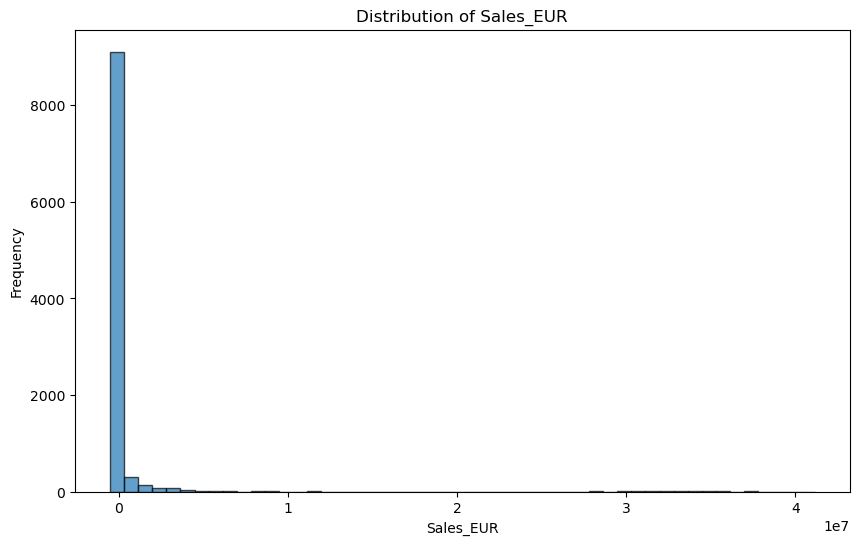

In [104]:
# Plot histogram for Sales_EUR
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Sales_EUR'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Sales_EUR')
plt.ylabel('Frequency')
plt.title('Distribution of Sales_EUR')
plt.show()

**DATE**

In [107]:
# Convert to datetime with day first
sales_data['DATE'] = sales_data['DATE'].apply(pd.to_datetime, dayfirst=True) 

# Check the data type
sales_data['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9802 entries, 0 to 9801
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
9802 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB


In [125]:
print('Oldest date in Sales Data:', sales_data['DATE'].min())
print('Newest date in Sales Data:', sales_data['DATE'].max())

Oldest date in Sales Data: 2018-10-01 00:00:00
Newest date in Sales Data: 2022-04-30 00:00:00


<a class="anchor" id="sub-section-1_3_2">

### 1.3.2. Initial Analysis
    
</a>

In [121]:
sales_data.describe(include='all')

,DATE,Mapped_GCK,Sales_EUR,date
count,9802,9802,9802.0000,9802
unique,NaN,14,NaN,43
top,NaN,#1,NaN,2021m3
freq,NaN,1179,NaN,266
mean,2020-07-19 17:55:48.785961984,NaN,272785.6867,NaN
min,2018-10-01 00:00:00,NaN,-506381.1700,NaN
25%,2019-08-30 00:00:00,NaN,0.0000,NaN
50%,2020-07-26 12:00:00,NaN,0.0000,NaN
75%,2021-06-09 00:00:00,NaN,0.0000,NaN
max,2022-04-30 00:00:00,NaN,41127988.0200,NaN


In [118]:
# Check duplicate rows
sales_data[sales_data.duplicated() == True]

,DATE,Mapped_GCK,Sales_EUR,date


In [120]:
# Check for missing values
missing_values = sales_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [128]:
# Check negative values, errors?
len(sales_data[sales_data['Sales_EUR'] < 0])

276

<a class="anchor" id="sub-section-1_4">

## 1.4. Merging Sales and Market Data
    
</a>

In [111]:
# Create a new column in YYYYmM format (same as Market Data)
sales_data['date'] = sales_data['DATE'].dt.strftime('%Ym%-m')

In [112]:
# Aggregate sales by month
monthly_sales = sales_data.groupby('date')['Sales_EUR'].sum().reset_index()
monthly_sales.head()

,date,Sales_EUR
0,2018m10,49471370.8300
1,2018m11,30760578.4700
2,2018m12,61312068.7900
3,2019m1,51360149.2300
4,2019m10,63440758.3600


In [113]:
# Merge the two dataframes on date
market_data = market_data.merge(monthly_sales, on='date', how='left')

In [114]:
market_data.head()

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org,Sales_EUR
0,2004m2,16.9407,16.9407,112.0913,83.4589,82.6230,79.4525,124.2896,86.5605,109.3340,110.4953,91.2219,89.9873,111.3538,73.6013,107.6014,79.2402,97.1229,80.0985,54.0398,44.1233,48.7479,87.0770,39.6395,36.6238,1.2646,78.9699,80.7574,93.0200,NaN,93.2305,NaN,102.4917,97.5974,97.1000,106.1920,116.7903,110.8900,118.2741,80.8290,117.7240,NaN,81.1000,120.7065,141.5109,106.1613,102.0771,85.9132,NaN
1,2004m3,23.7119,23.7119,136.3280,106.1682,100.5566,97.0129,143.4117,106.3445,140.8846,144.6862,85.8663,79.8836,127.5586,84.0476,110.1874,98.6190,113.7839,96.0159,54.6662,47.5890,49.2562,87.1927,42.5920,39.9311,1.2262,79.6736,80.9621,93.5403,NaN,93.3357,NaN,105.6275,113.2249,91.1951,121.6251,139.2884,141.1769,148.1218,102.1301,119.2208,NaN,76.6903,138.3095,152.8802,140.2887,117.2257,97.6708,NaN
2,2004m4,24.4352,24.4352,117.7918,92.0076,89.6532,84.9324,129.0838,95.5797,105.8536,102.6558,85.6225,79.7408,108.7323,73.0260,108.1666,89.7740,101.7152,85.1672,54.8727,47.7790,49.4238,91.3799,42.6506,39.1349,1.1985,80.3376,80.7574,93.8524,NaN,93.4409,NaN,103.4850,100.1691,93.7935,104.9655,125.2896,105.6488,125.4822,90.9614,117.4411,NaN,71.5524,115.5573,137.7969,106.2712,105.3358,87.2540,NaN
3,2004m5,23.7081,23.7081,109.0025,85.6965,86.8806,82.3728,135.5904,100.0870,101.8648,100.3053,85.3787,79.5980,110.6452,74.5919,108.4259,87.4638,101.2757,84.4858,51.2304,53.5909,46.4684,99.0445,47.5171,36.2784,1.2007,80.7988,80.7574,93.8524,NaN,93.5461,NaN,103.6439,99.5814,96.3920,105.8854,131.9890,101.9904,116.6497,88.0829,117.8992,NaN,66.4145,119.2695,143.8605,101.6087,96.6165,84.6756,NaN
4,2004m6,27.0091,27.0091,133.7857,106.6415,99.0108,95.1087,136.4249,110.8897,120.3329,119.6164,85.1349,79.4552,122.0210,82.3433,110.5699,97.3645,112.0572,96.9633,52.8763,50.7996,47.8039,98.6363,44.9676,35.6574,1.2138,80.9135,80.5527,93.9565,NaN,93.4409,NaN,106.0627,109.2777,98.9904,118.2523,132.9889,122.1366,143.2487,100.9787,119.4991,NaN,61.2766,128.8494,144.3153,116.6552,118.4587,95.4018,NaN


In [122]:
# Check for missing values
missing_values = market_data.isnull().sum()
missing_values[missing_values > 0]

MAB_ELE_PRO756      1
MAB_ELE_SHP756      1
MAB_ELE_SHP826     18
MAB_ELE_SHP840      1
PRI27826_org       18
PRI27250_org       35
PRI27156_org       23
PRO28756_org        1
PRO271000_org      11
PRO27756_org        1
Sales_EUR         207
dtype: int64

The missing values in Sales_EUR correspond to periods not covered in the sales dataset, as it only includes transactions from October 2018 to April 2022.

In [124]:
print('Oldest date in Market Data:', market_data['date'].min())
print('Newest date in Market Data:', market_data['date'].max())

Oldest date in Market Data:  2004m2
Newest date in Market Data: 2021m12


Have some Sales_EUR not transcribed to the Market data dataframe? Check trend and 'forecast' market data for the remaining 4 months?

<a class="anchor" id="sub-section-1_5">

## 1.5. Exploratory Data Analysis
    
</a>